<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura: Data preprocessing</center>

# Challenge S1: Introducción

# Objetivos

En este challenge nos enfrentaremos a un dataset con datos sobre inmuebles en California. Este dataset tiene la particularidad de poseer valores nulos/faltantes y outliers en algunas de sus variables. Por tanto, el objetivo es poner en práctica las técnicas que hemos visto en el worksheet para lidiar con estas situaciones.

# Configuración del entorno

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carga de datos
Esta vez va a ser fácil, vamos a importar los datos de un fichero csv, utilizaremos la función read_csv que nos proporciona la libreria de pandas.

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Valores nulos

En primer lugar, identifica aquellas columnas que tienen valores nulos/faltantes

In [15]:
df.info() # la columna total_bedrooms es la única que tiene valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


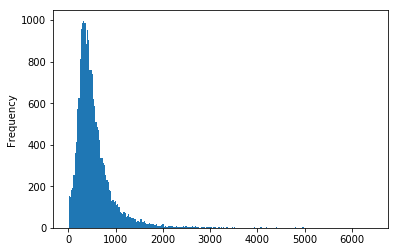

In [30]:
df['total_bedrooms'].plot.hist(bins=250)

Prueba diferentes estrategias de manejo de valores nulos.

Primero, crea una copia de esta columna utilizando la estrategia de rellenado con la mediana.

In [23]:
df['total_bedrooms_median'] = df['total_bedrooms'].copy()

In [24]:
from sklearn.impute import SimpleImputer
temp_data = df['total_bedrooms_median'].values.reshape(-1, 1)

In [26]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(temp_data)
df['total_bedrooms_median'] = imp_median.transform(temp_data)

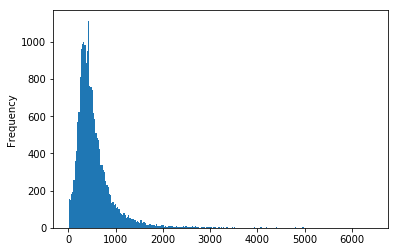

In [32]:
df['total_bedrooms_median'].plot.hist(bins=250)

Segundo, crea una copia de esta columna utilizando la estrategia de rellenado con media aritmética.

In [33]:
df['total_bedrooms_mean'] = df['total_bedrooms'].copy()

In [34]:
from sklearn.impute import SimpleImputer
temp_data = df['total_bedrooms_mean'].values.reshape(-1, 1)

In [35]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median.fit(temp_data)
df['total_bedrooms_mean'] = imp_median.transform(temp_data)

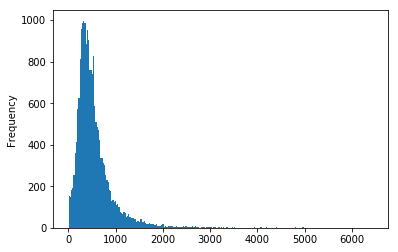

In [36]:
df['total_bedrooms_mean'].plot.hist(bins=250)

Tercero, crea una copia de esta columna utilizando la estrategia de rellenado con valor fijo de 0.

In [40]:
df['total_bedrooms_fixed'] = df['total_bedrooms'].copy()

In [41]:
from sklearn.impute import SimpleImputer
temp_data = df['total_bedrooms_fixed'].values.reshape(-1, 1)

In [43]:
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value= 0)
imp_constant.fit(temp_data)
df['total_bedrooms_fixed'] = imp_constant.transform(temp_data)

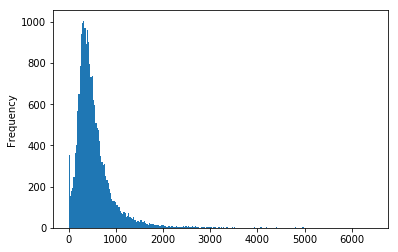

In [44]:
df['total_bedrooms_fixed'].plot.hist(bins=250)

Cuarto, crea una copia de esta columna utilizando una nueva estrategia de rellenado que tú quieras y **justifica el motivo**.

In [45]:
df['total_bedrooms_mode'] = df['total_bedrooms'].copy()

In [46]:
from sklearn.impute import SimpleImputer
temp_data = df['total_bedrooms_mode'].values.reshape(-1, 1)

In [48]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode.fit(temp_data)
df['total_bedrooms_mode'] = imp_mean.transform(temp_data)

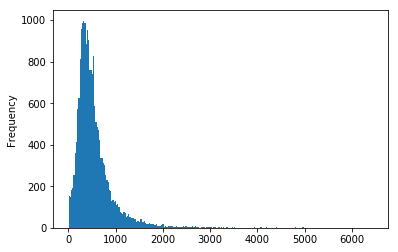

In [50]:
df['total_bedrooms_mode'].plot.hist(bins=250)

Analiza el efecto de estas cuatro estrategias de rellenado con respecto a la variable original con valores nulos:

* ¿Qué diferencias observas en la distribución de valores de las variables rellenadas?
* ¿Cómo crees que pueden afectar los nuevos a algún análisis posterior?
* ¿Con qué estrategia te quedarías?

# Outliers

Ahora, vamos a realizar un estudio de outliers sobre nuestro conjunto de datos. 

En primer lugar, ¿se te ocurre alguna forma sencilla de ver que variables pueden contener outliers?

In [52]:
df = pd.read_csv('housing.csv')

Selecciona una de estas variables y muestra un gráfico en el que sea evidente la presencia del outlier

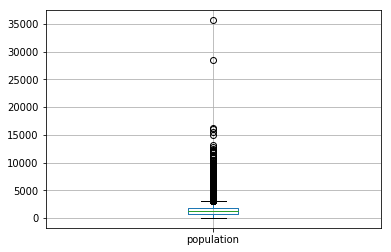

In [53]:
df.boxplot('population')

Aplica el método de tukey visto en el Worksheet para filtrar el outlier.

In [54]:
def filtrar_outlier_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [56]:
outlier_indices, outlier_values = filtrar_outlier_tukey(df['population'])

[q1=787.000000, q3=1725.000000, iqr=938.000000]
[floor=-620.000000, ceiling=3132.000000]


In [57]:
df['population_tukey'] = df['population'].copy()
for index in outlier_indices:
    df['population_tukey'].at[index] = np.nan

Muestra el mismo gráfico de antes para tu variable sin esos outliers

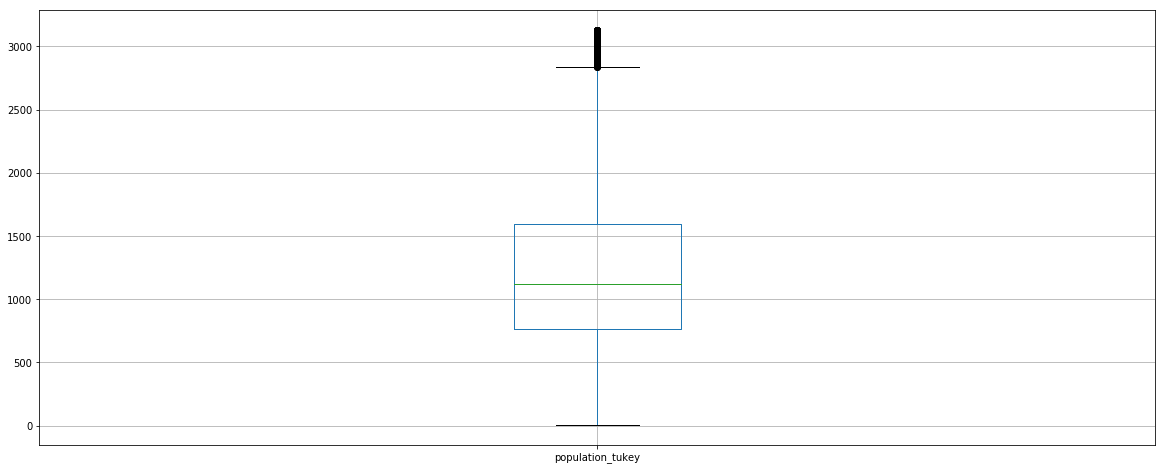

In [60]:
plt.subplots(figsize=[20,8])
df.boxplot('population_tukey')

Ahora, prueba a ejectuar el mismo método de tukey pero relajando la zona de outlier a $Q_3 + 3 \times IQR$.

In [65]:
def filtrar_outlier_tukey_relaxed(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - 3*iqr
    ceiling = q3 + 3*iqr
    print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [66]:
outlier_indices, outlier_values = filtrar_outlier_tukey_relaxed(df['population'])

[q1=787.000000, q3=1725.000000, iqr=938.000000]
[floor=-2027.000000, ceiling=4539.000000]


In [67]:
df['population_tukey_relaxed'] = df['population'].copy()
for index in outlier_indices:
    df['population_tukey_relaxed'].at[index] = np.nan

Y pinta el mismo gráfico de antes para tu variable sin outliers 

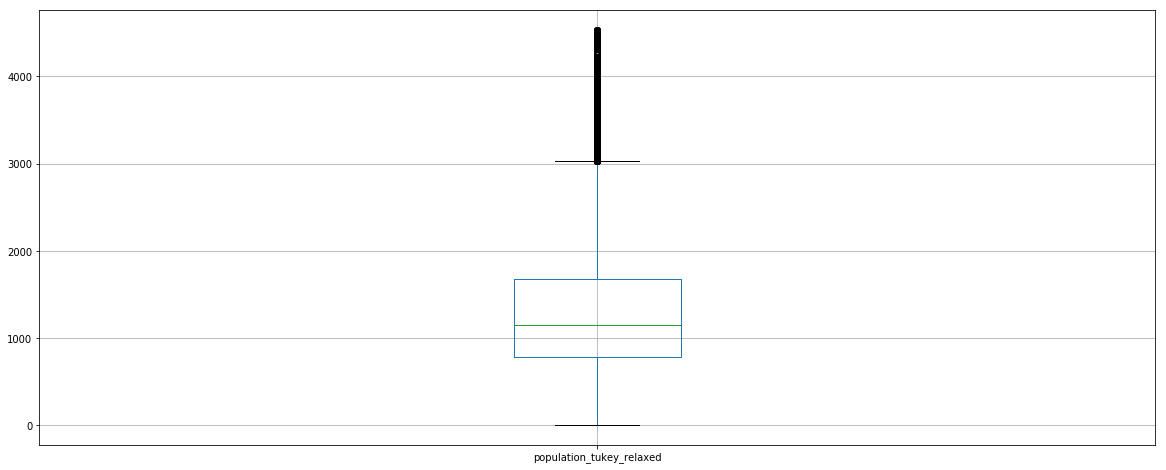

In [68]:
plt.subplots(figsize=[20,8])
df.boxplot('population_tukey_relaxed')

¿Qué diferencias observas en los resultados para los dos umbrales de tukey? ¿A qué crees que se debe?

In [ ]:
# Al relajar las fronteras, se cuelan más outliers.

Prueba un nuevo método de detección de outliers que encuentres por Internet y compáralo con los anteriores.

In [87]:
from scipy import stats

def outliers_z_score(df, colname, threshold = 3):
    z_scores = stats.zscore(df[colname])
    abs_z_scores = np.abs(z_scores)
    mask = (abs_z_scores > 3)
    return np.where(mask == True)

In [88]:
df = pd.read_csv('housing.csv')
outliers_indices = outliers_z_score(df, 'population')
outliers_indices

(array([  283,   570,   576,   780,   799,   864,   865,   867,   869,
          871,   922,   985,   995,  1010,  1021,  1039,  1060,  1086,
         1560,  1642,  1700,  1930,  2025,  2119,  2294,  2311,  2963,
         2975,  2978,  2999,  3004,  3167,  3177,  3413,  3554,  3560,
         3603,  3607,  3621,  3648,  3829,  3871,  3942,  3981,  4035,
         4264,  4266,  4267,  4579,  4616,  4634,  4636,  4670,  5540,
         5724,  5815,  5921,  5924,  5963,  5964,  5968,  5983,  6055,
         6057,  6058,  6061,  6063,  6065,  6066,  6070,  6143,  6287,
         6289,  6297,  6298,  6303,  6328,  6329,  6338,  6340,  6401,
         6502,  6516,  6518,  6550,  6844,  7130,  7357,  7361,  7617,
         7864,  7907,  8467,  8468,  8520,  8716,  8717,  8728,  8804,
         8985,  8986,  9004,  9013,  9018,  9019,  9027,  9036,  9040,
         9064,  9081,  9084,  9114,  9118,  9122,  9123,  9128,  9131,
         9133,  9135,  9145,  9149,  9154,  9159,  9166,  9167,  9170,
      

In [89]:
df['population_z'] = df['population'].copy()
for index in outlier_indices:
    df['population_z'].at[index] = np.nan

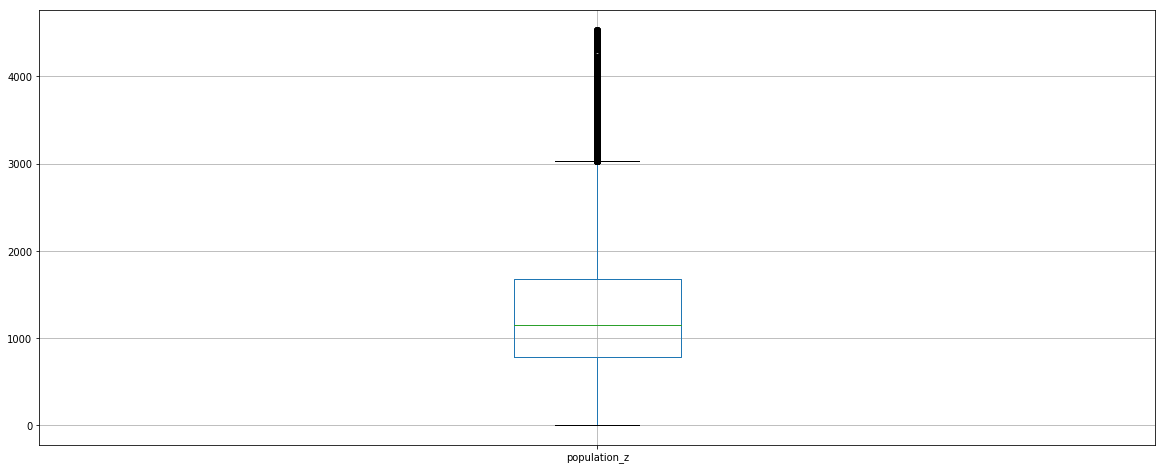

In [91]:
plt.subplots(figsize=[20,8])
df.boxplot('population_z')